In [267]:
import pandas
import numpy
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [249]:
train_df = pd.read_csv('train_data.csv')
train_df.drop(['game_mode'], axis=1)
train_df.head()
X= train_df.drop(['game_mode', 'radiant_win','match_id'], axis=1)


In [250]:
X.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
0,47,71,98,89,68,47,71,98,89,68
1,71,123,6,69,59,71,123,6,69,59
2,63,91,114,61,93,63,91,114,61,93
3,31,102,91,13,4,31,102,91,13,4
4,61,27,25,104,93,61,27,25,104,93


In [251]:
X.shape[1]

10

In [252]:
y = train_df['radiant_win']
y = [int(b) for b in y]
y = pd.DataFrame(y, columns=['radiant_win'])
y.head()

,radiant_win
0,0
1,0
2,0
3,1
4,0


In [291]:
y.describe()

,radiant_win
count,92000.000000
mean,0.565217
std,0.495731
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [292]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [293]:
X_train.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
15456,47,71,98,89,68,47,71,98,89,68
91952,47,74,12,102,30,47,74,12,102,30
46956,6,85,37,2,76,6,85,37,2,76
82743,28,7,34,21,85,28,7,34,21,85
73653,2,48,46,45,123,2,48,46,45,123


In [294]:
y_train.head()

,radiant_win
15456,0
91952,0
46956,0
82743,0
73653,0


### Model

In [295]:
model = keras.Sequential([
    layers.Dense(60, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(1, activation='sigmoid'),
])

Epoch 1/20
270/270 [==============================] - 3s 9ms/step - loss: 1.2383 - binary_accuracy: 0.7862 - val_loss: 0.2301 - val_binary_accuracy: 0.9138
Epoch 2/20
270/270 [==============================] - 2s 8ms/step - loss: 0.1942 - binary_accuracy: 0.9480 - val_loss: 0.1559 - val_binary_accuracy: 0.9891
Epoch 3/20
270/270 [==============================] - 2s 8ms/step - loss: 0.1417 - binary_accuracy: 0.9875 - val_loss: 0.1209 - val_binary_accuracy: 0.9902
Epoch 4/20
270/270 [==============================] - 2s 8ms/step - loss: 0.1063 - binary_accuracy: 0.9982 - val_loss: 0.0913 - val_binary_accuracy: 1.0000
Epoch 5/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0835 - binary_accuracy: 0.9980 - val_loss: 0.0692 - val_binary_accuracy: 1.0000
Epoch 6/20
270/270 [==============================] - 2s 8ms/step - loss: 0.0631 - binary_accuracy: 0.9998 - val_loss: 0.0561 - val_binary_accuracy: 1.0000
Epoch 7/20
270/270 [==============================] - 2s 8ms/ste

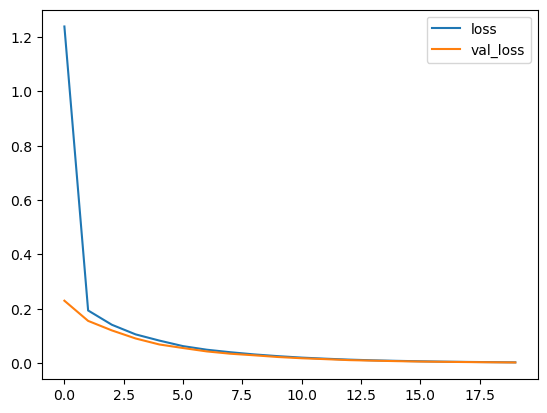

In [296]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['binary_accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
    verbose=1,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

### Test Data

In [275]:
test_df = pd.read_csv('train_data.csv')
test_df.drop(['game_mode'], axis=1)
test_df.head()
X_test= test_df.drop(['game_mode', 'radiant_win','match_id'], axis=1)
y_test = test_df['radiant_win']

In [283]:
X_test.head()

,r_hero1,r_hero2,r_hero3,r_hero4,r_hero5,d_hero1,d_hero2,d_hero3,d_hero4,d_hero5
0,47,71,98,89,68,47,71,98,89,68
1,71,123,6,69,59,71,123,6,69,59
2,63,91,114,61,93,63,91,114,61,93
3,31,102,91,13,4,31,102,91,13,4
4,61,27,25,104,93,61,27,25,104,93


In [263]:
y = test_df['radiant_win']
y = [int(b) for b in y]
y = pd.DataFrame(y, columns=['radiant_win'])
y.head()

,radiant_win
0,0
1,0
2,0
3,1
4,0


In [297]:
predicts = model.predict(X_test)

2875/2875 [==============================] - 6s 2ms/step


In [330]:
y_test_l = [int(b) for b in y_test]

results = []
for i in range(len(predicts)):
    if y_test_l[i] == round(predicts[i][0]):
        results.append(1)

print(len(results))
print(len(y_test))


92000
92000
